<a href="https://colab.research.google.com/github/cemgundogan/sports_analytics_foundations/blob/main/Sports_Analytics_Assignment_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


First few rows of the loaded data:
       Date        HomeTeam      AwayTeam  FTHG  FTAG FTR
0  20170811         Arsenal     Leicester     4     3   H
1  20170812        Brighton      Man City     0     2   A
2  20170812         Chelsea       Burnley     2     3   A
3  20170812  Crystal Palace  Huddersfield     0     3   A
4  20170812         Everton         Stoke     1     0   H

Number of games in each period:
2017: 209 games
2018: 171 games


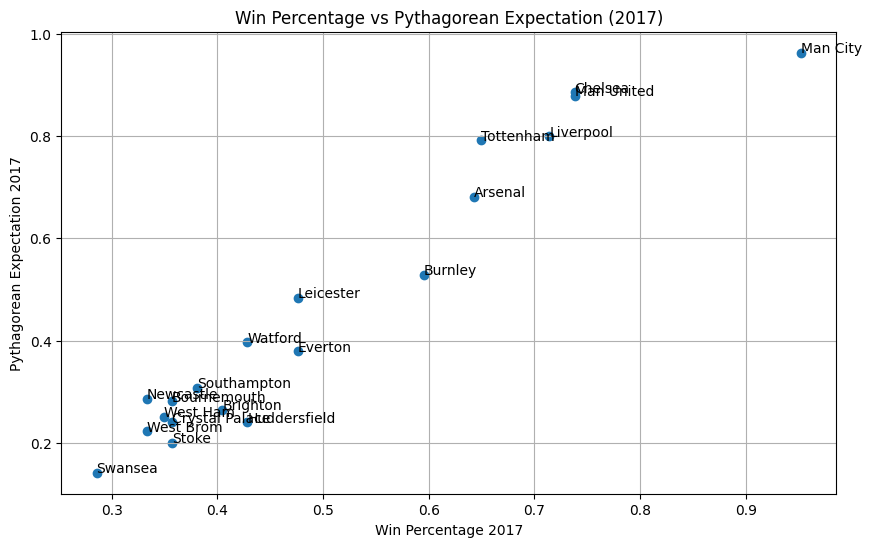

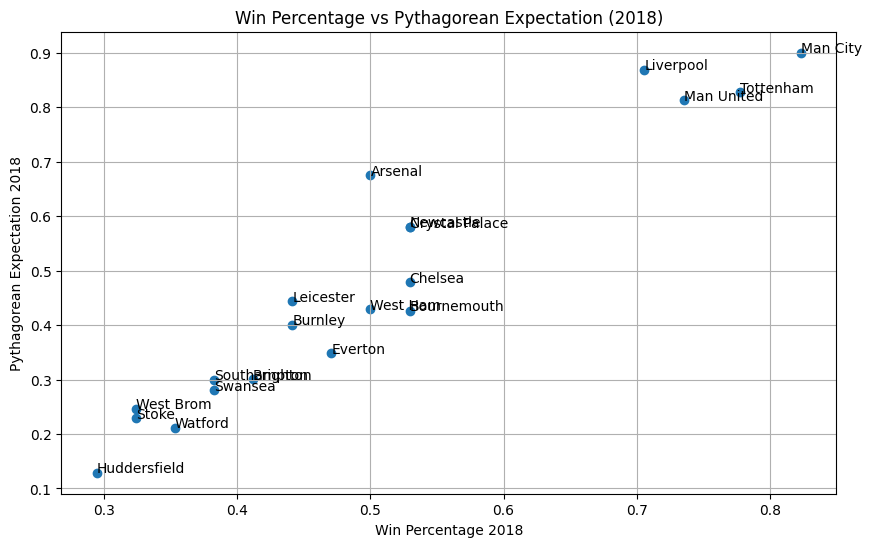


Final merged statistics:
              Team  wpc_2017  pyth_2017  wpc_2018  pyth_2018
0          Arsenal  0.642857   0.681132  0.500000   0.674649
1      Bournemouth  0.357143   0.280899  0.529412   0.426330
2         Brighton  0.404762   0.264706  0.411765   0.300333
3          Burnley  0.595238   0.528548  0.441176   0.400990
4          Chelsea  0.738095   0.885847  0.529412   0.478733
5   Crystal Palace  0.357143   0.240356  0.529412   0.579491
6          Everton  0.476190   0.379018  0.470588   0.348120
7     Huddersfield  0.428571   0.240356  0.294118   0.128866
8        Leicester  0.476190   0.484131  0.441176   0.443577
9        Liverpool  0.714286   0.800000  0.705882   0.868633
10        Man City  0.952381   0.962743  0.823529   0.900000
11      Man United  0.738095   0.878385  0.735294   0.812744
12       Newcastle  0.333333   0.286281  0.529412   0.580552
13     Southampton  0.380952   0.307692  0.382353   0.299482
14           Stoke  0.357143   0.200000  0.323529   0.22929

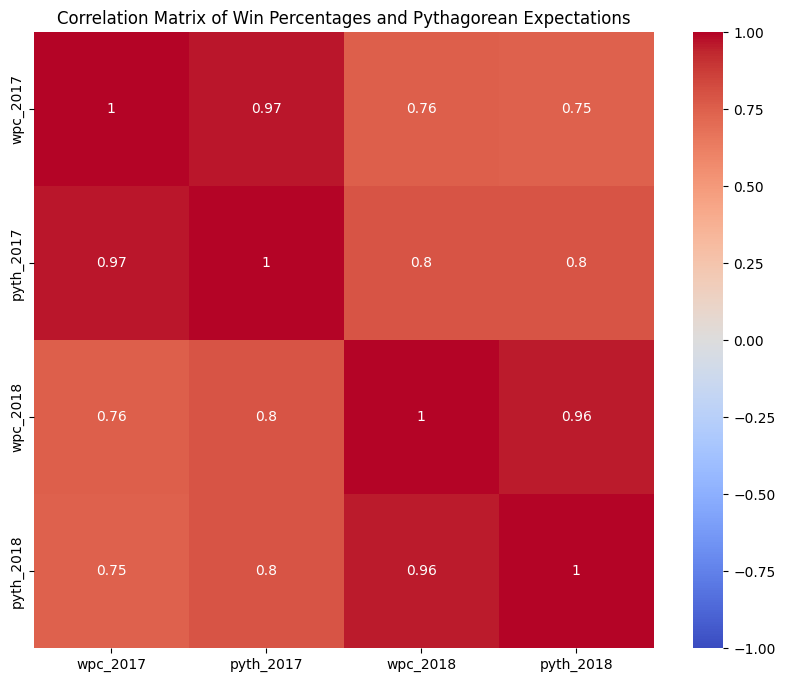

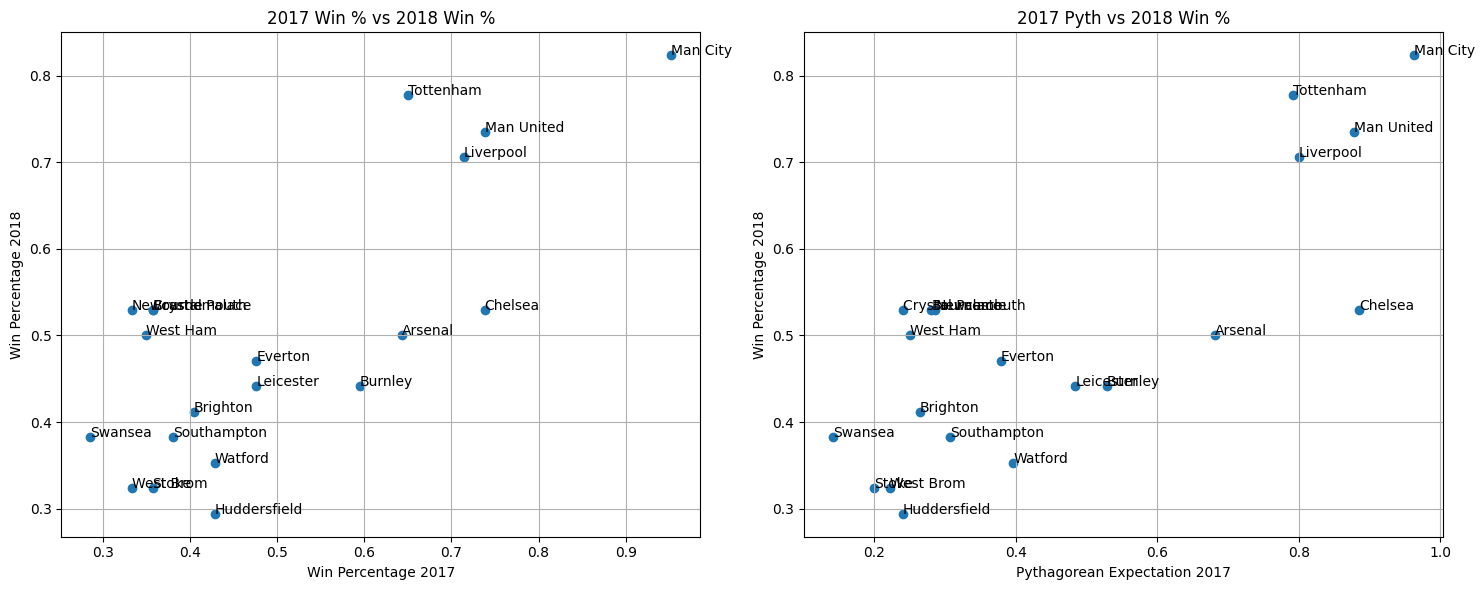


Summary Statistics:
        wpc_2017  pyth_2017   wpc_2018  pyth_2018
count  20.000000  20.000000  20.000000  20.000000
mean    0.500000   0.461210   0.499183   0.473341
std     0.182915   0.270321   0.154337   0.236570
min     0.285714   0.141660   0.294118   0.128866
25%     0.357143   0.248367   0.382353   0.294836
50%     0.428571   0.343355   0.485294   0.427632
75%     0.644643   0.708793   0.529412   0.604076
max     0.952381   0.962743   0.823529   0.900000

Correlations with 2018 Win Percentage:
2017 Win %: 0.7565725835012252
2017 Pythagorean Expectation: 0.7956926216576091


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the datafile and show first few rows
df = pd.read_excel('EPL2017-18.xlsx')
print("\nFirst few rows of the loaded data:")
print(df.head())

# 2. Create values for home wins, away wins and count
df['home_win'] = np.where(df['FTR'] == 'H', 1, np.where(df['FTR'] == 'D', 0.5, 0))
df['away_win'] = np.where(df['FTR'] == 'A', 1, np.where(df['FTR'] == 'D', 0.5, 0))
df['count'] = 1

# 3. Split into 2017 and 2018 games
df_2017 = df[df['Date'] < 20180000]
df_2018 = df[df['Date'] >= 20180000]

print("\nNumber of games in each period:")
print(f"2017: {len(df_2017)} games")
print(f"2018: {len(df_2018)} games")

# 4-5. Create aggregated dataframes for home and away
home_2017 = df_2017.groupby('HomeTeam').agg({
    'count': 'sum',
    'home_win': 'sum',
    'FTHG': 'sum',
    'FTAG': 'sum'
}).reset_index()

away_2017 = df_2017.groupby('AwayTeam').agg({
    'count': 'sum',
    'away_win': 'sum',
    'FTAG': 'sum',
    'FTHG': 'sum'
}).reset_index()

# 6. Rename variables
home_2017.columns = ['Team', 'home_games', 'home_wins', 'home_gf', 'home_ga']
away_2017.columns = ['Team', 'away_games', 'away_wins', 'away_gf', 'away_ga']

# 7. Merge home and away dataframes for 2017
team_stats_2017 = pd.merge(home_2017, away_2017, on='Team')

# 8. Calculate totals and create wpc and pyth for 2017
team_stats_2017['total_games'] = team_stats_2017['home_games'] + team_stats_2017['away_games']
team_stats_2017['total_wins'] = team_stats_2017['home_wins'] + team_stats_2017['away_wins']
team_stats_2017['total_gf'] = team_stats_2017['home_gf'] + team_stats_2017['away_gf']
team_stats_2017['total_ga'] = team_stats_2017['home_ga'] + team_stats_2017['away_ga']

team_stats_2017['wpc_2017'] = team_stats_2017['total_wins'] / team_stats_2017['total_games']
team_stats_2017['pyth_2017'] = (team_stats_2017['total_gf']**2) / (team_stats_2017['total_gf']**2 + team_stats_2017['total_ga']**2)

# Plot 2017 stats
plt.figure(figsize=(10, 6))
plt.scatter(team_stats_2017['wpc_2017'], team_stats_2017['pyth_2017'])
plt.xlabel('Win Percentage 2017')
plt.ylabel('Pythagorean Expectation 2017')
plt.title('Win Percentage vs Pythagorean Expectation (2017)')

# Add team labels
for i, txt in enumerate(team_stats_2017['Team']):
    plt.annotate(txt, (team_stats_2017['wpc_2017'].iloc[i], team_stats_2017['pyth_2017'].iloc[i]))
plt.grid(True)
plt.show()

# 9. Repeat for 2018 games
home_2018 = df_2018.groupby('HomeTeam').agg({
    'count': 'sum',
    'home_win': 'sum',
    'FTHG': 'sum',
    'FTAG': 'sum'
}).reset_index()

away_2018 = df_2018.groupby('AwayTeam').agg({
    'count': 'sum',
    'away_win': 'sum',
    'FTAG': 'sum',
    'FTHG': 'sum'
}).reset_index()

home_2018.columns = ['Team', 'home_games', 'home_wins', 'home_gf', 'home_ga']
away_2018.columns = ['Team', 'away_games', 'away_wins', 'away_gf', 'away_ga']

team_stats_2018 = pd.merge(home_2018, away_2018, on='Team')

team_stats_2018['total_games'] = team_stats_2018['home_games'] + team_stats_2018['away_games']
team_stats_2018['total_wins'] = team_stats_2018['home_wins'] + team_stats_2018['away_wins']
team_stats_2018['total_gf'] = team_stats_2018['home_gf'] + team_stats_2018['away_gf']
team_stats_2018['total_ga'] = team_stats_2018['home_ga'] + team_stats_2018['away_ga']

team_stats_2018['wpc_2018'] = team_stats_2018['total_wins'] / team_stats_2018['total_games']
team_stats_2018['pyth_2018'] = (team_stats_2018['total_gf']**2) / (team_stats_2018['total_gf']**2 + team_stats_2018['total_ga']**2)

# Plot 2018 stats
plt.figure(figsize=(10, 6))
plt.scatter(team_stats_2018['wpc_2018'], team_stats_2018['pyth_2018'])
plt.xlabel('Win Percentage 2018')
plt.ylabel('Pythagorean Expectation 2018')
plt.title('Win Percentage vs Pythagorean Expectation (2018)')

# Add team labels
for i, txt in enumerate(team_stats_2018['Team']):
    plt.annotate(txt, (team_stats_2018['wpc_2018'].iloc[i], team_stats_2018['pyth_2018'].iloc[i]))
plt.grid(True)
plt.show()

# 10. Merge 2017 and 2018 summary files
final_stats = pd.merge(
    team_stats_2017[['Team', 'wpc_2017', 'pyth_2017']],
    team_stats_2018[['Team', 'wpc_2018', 'pyth_2018']],
    on='Team'
)

print("\nFinal merged statistics:")
print(final_stats)

# 11. Generate and visualize correlation matrix
correlation_matrix = final_stats[['wpc_2017', 'pyth_2017', 'wpc_2018', 'pyth_2018']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Win Percentages and Pythagorean Expectations')
plt.show()

# Prediction comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 2017 Win Percentage as predictor
ax1.scatter(final_stats['wpc_2017'], final_stats['wpc_2018'])
ax1.set_xlabel('Win Percentage 2017')
ax1.set_ylabel('Win Percentage 2018')
ax1.set_title('2017 Win % vs 2018 Win %')
ax1.grid(True)

# 2017 Pythagorean Expectation as predictor
ax2.scatter(final_stats['pyth_2017'], final_stats['wpc_2018'])
ax2.set_xlabel('Pythagorean Expectation 2017')
ax2.set_ylabel('Win Percentage 2018')
ax2.set_title('2017 Pyth vs 2018 Win %')
ax2.grid(True)

# Add team labels to both plots
for i, txt in enumerate(final_stats['Team']):
    ax1.annotate(txt, (final_stats['wpc_2017'].iloc[i], final_stats['wpc_2018'].iloc[i]))
    ax2.annotate(txt, (final_stats['pyth_2017'].iloc[i], final_stats['wpc_2018'].iloc[i]))

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(final_stats.describe())

# Print correlations between predictors and 2018 win percentage
print("\nCorrelations with 2018 Win Percentage:")
print("2017 Win %:", correlation_matrix.loc['wpc_2017', 'wpc_2018'])
print("2017 Pythagorean Expectation:", correlation_matrix.loc['pyth_2017', 'wpc_2018'])